How often we can do a NuSTAR DEM will be limited by the counts observed in our highest energy range. We need good statistics (>10 actual counts) in each interval. 

Note: this specifically refers to the COUNTS RECORDED BY NUSTAR – due to low livetime, this is much lower than the estimated incident event rate. 

Specifically, we need to select time intervals where there are sufficient counts 
- in our highest energy range
- in the selected region
AND
- of the correct event grade
AND/OR
- after pile-up correction (subtraction of unphysical grades)


Properly checking if there are sufficient counts is fairly computationally expensive, because the grade and region selection need to be done via creation of the actual NuSTAR spectral data products for each time interval (takes a while). This needs to be done anyway (to do DEMs), but we want to avoid making spectral data products for intervals with not enough counts just to check. So, we use methods in time_interval_selection.py to estimate counts in a given interval using the full-detector .evt and .hk files (before time, grade, region selection). 

Here, we show an example of how this is done for a sample NuSTAR orbit. 

First, edit the paths in the following cell to point to the correct locations on your system. 

In [2]:
#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jessieduncan/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

#do-dem
import time_interval_selection as tis


#Basics
import numpy as np
import importlib
import matplotlib.pyplot as plt
import datetime
import os
import pathlib
os.getcwd()

'/Users/jessieduncan/do-dem'

/Users/jessieduncan/do-dem//dodem/lightcurves.py:751: RuntimeWarning: invalid value encountered in divide
  countrate=counts/lvt[:-1]


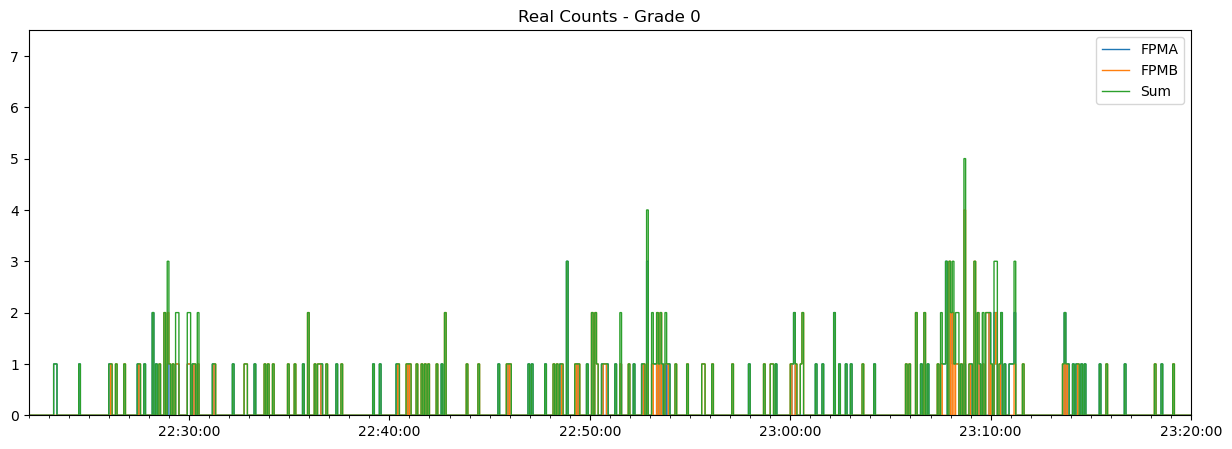

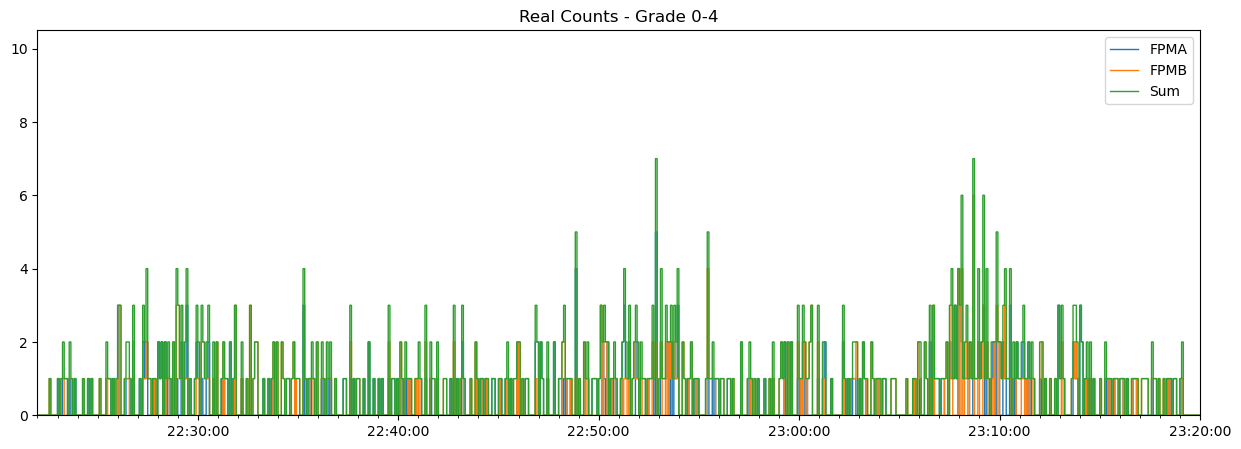

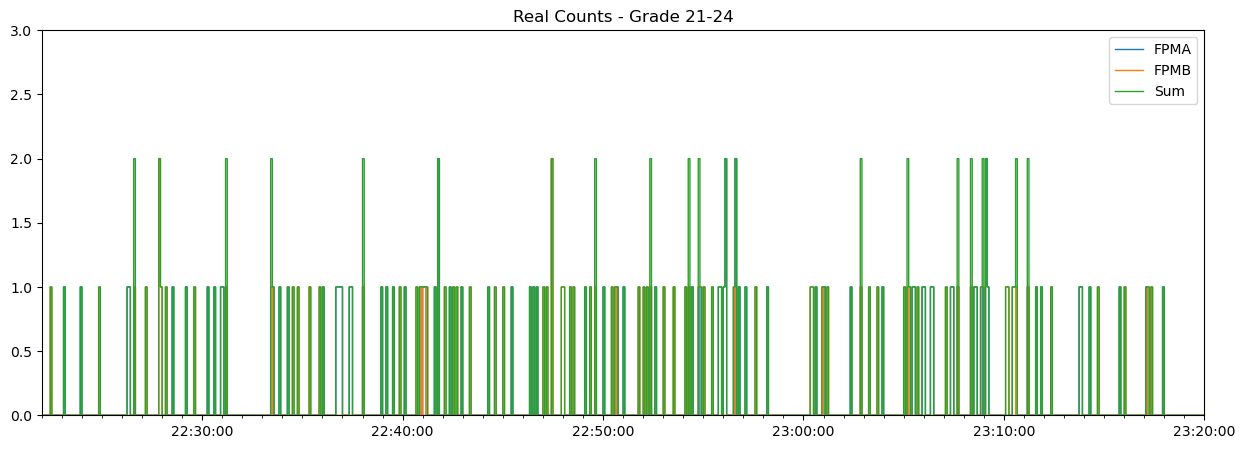

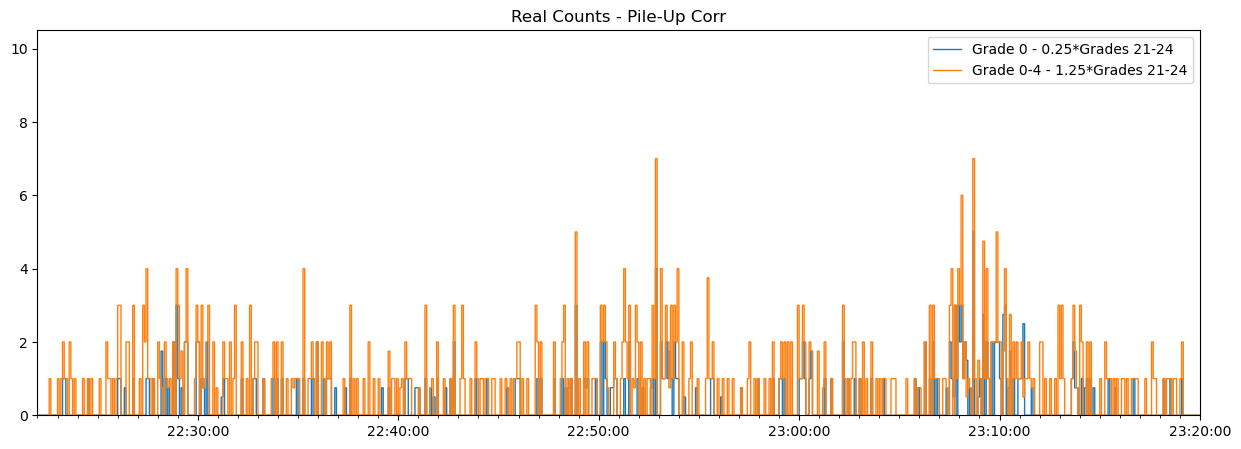

In [3]:
#First, make real-counts lightcurves to visualize the time evolution + examine statistics 
#(this is optional but usually interesting. )

#Name your working directory
working_dir='./initial_dem/'

#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

#Set path to obsid directory - initial pipeline should have been run already.
datapath='/Users/jessieduncan/nustar/may-2018/5_29pixpos/80410205001/'

#Comment second line if you're not using this same example nustar orbit
#Edit it to include only the desired time interval (default- all times in file) once you've run this once
#may 29 orbit 5
timerange=[datetime.datetime(2018, 5, 29, 22, 22), datetime.datetime(2018, 5, 29, 23, 20)]
#may 29 orbit 4
#timerange=[datetime.datetime(2018, 5, 29, 20, 46), datetime.datetime(2018, 5, 29, 21, 16)]
#may 29 orbit 1
#timerange=[datetime.datetime(2018, 5, 29, 15, 59, 30), datetime.datetime(2018, 5, 29, 16, 52)]

erange=[6.,10]

tis.real_count_lightcurves(datapath, timerange, working_dir, erange)

Options when finding intervals:

- __erange__ : set to highest energy range you want to use as a DEM input (higher energies = worse statistics)
- __countmin__: number of real counts you want in each DEM interval.
- __minimum_seconds__: set to a minimum duration for the DEM time intervals (optional, omit to not set a minimum). Effective minimum if not set is 5s (time binning of lightcurves). You could change this too by editing the lightcurve code. 
- __lctype__ : what kind of counts are you going to include? Options:
    
            'grade0' – grade 0 (FPMA,B sum)
            'grade04' - grade 0-4  (FPMA,B sum)
            'corr14' - grade 0 - (1/4)*grades 21-24 (FPMA, B sum)
            'corr54' - grade 0-4 - (5/4)*grades 21-24 (FPMA, B sum)
            
- __fast_min_factor__: factor multiplied by countmin when making an initial estimate of how long an interval is needed (fast method, without region selection). Accounts for the fact that some emission may fall outside the region. Adjust as needed; a larger factor will make this more time-efficient (less chance you'll make spectral data products for any too-small time intervals + have to repeat), but a smaller factor will get you closer to maximally-fine sampling in time.

Note on finding intervals: this is *slow* – it takes between 40 minutes to 3 hours on my machine for a single ~1 hr orbit, due to the need to make NuSTAR spectral data products for each interval. The brighter the source, the finer the time sampling, the longer it takes. But the spectral data products need to be made anyway to do DEMs, so it isn't a waste. 

In [5]:
#%%capture
#Comment out the above to view the output as the time interval selection process proceeds. 
#Note that relevant figures (grade-separated spectra, region images) are saved for each time interval.

#Now, find DEM time intervals + make NuSTAR spectral data products.
res = tis.find_time_intervals_plus(datapath, timerange, working_dir, erange=[6.,10], 
                               lctype='corr54', fast_min_factor=1.5, countmin=10,
                              minimum_seconds=30)


Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 22, 22)
 datetime.datetime(2018, 5, 29, 22, 25, 50)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( A ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( A ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Unphysical Grade Response Matrix Files (.rmf) for this FPM ( A ) in nustar path.
There are  0  Unphysical Grade PHA files (.pha) for this FPM ( A ) in nustar path.
We require 1 of each.
Now we will make some spectral data products.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
100% [.......

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8514635326108272


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  28.360000610351562
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [28.36000061]
ATC: 8.5

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8336184424894102


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-22-00_22-25-50/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.039999961853027
ATC: 5.5

8.5  counts in FPM A   5.5  counts in FPM B . Total: 14.0  Exiting.
Found Time Interval 22-22-00 22-25-50
Counts:  14.0

Fast Method Counts:  15.75
[datetime.datetime(2018, 5, 29, 22, 25, 50)
 datetime.datetime(2018, 5, 29, 22, 27, 25)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There a

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8444891947942653


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  8.15999984741211
ATC: 9.25

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8131732460878422


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-25-50_22-27-25/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.71999979019165
ATC: 11.5

9.25  counts in FPM A   11.5  counts in FPM B . Total: 20.75  Exiting.
Found Time Interval 22-25-50 22-27-25
Counts:  20.75

Fast Method Counts:  18.75
[datetime.datetime(2018, 5, 29, 22, 27, 25)
 datetime.datetime(2018, 5, 29, 22, 29)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There a

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8462324239875015


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-27-25_22-29-00/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  39.07999801635742
Highest energy range: [6.0, 10]
Total Above:  2
Above Energies:  [11.96000004 39.07999802]
ATC: 10.75

10.75  counts just in FPM A . Exiting.
Found Time Interval 22-27-25 22-29-00
Counts:  10.75

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 22, 29)
 datetime.datetime(2018, 5, 29, 22, 30)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8479359328820669


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-29-00_22-30-00/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.71999979019165
ATC: 10.75

10.75  counts just in FPM A . Exiting.
Found Time Interval 22-29-00 22-30-00
Counts:  10.75

Fast Method Counts:  16.5
[datetime.datetime(2018, 5, 29, 22, 30)
 datetime.datetime(2018, 5, 29, 22, 31, 40)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (.r

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.849759339903736


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  8.319999694824219
ATC: 4.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8060213414634146


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-30-00_22-31-40/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.159999847412109
ATC: 11.75

4.75  counts in FPM A   11.75  counts in FPM B . Total: 16.5  Exiting.
Found Time Interval 22-30-00 22-31-40
Counts:  16.5

Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 22, 31, 40)
 datetime.datetime(2018, 5, 29, 22, 33)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There a

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8473224868009913


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.599999904632568
ATC: 1.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8086682311528307


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-31-40_22-33-00/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.919999599456787
ATC: 13.0

1.75  counts in FPM A   13.0  counts in FPM B . Total: 14.75  Exiting.
Found Time Interval 22-31-40 22-33-00
Counts:  14.75

Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 22, 33)
 datetime.datetime(2018, 5, 29, 22, 35, 40)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There a

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8504560471128986


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.679999828338623
ATC: 8.0

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8069342329623586


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-33-00_22-35-40/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  20.479999542236328
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [20.47999954]
ATC: 7.5

8.0  counts in FPM A   7.5  counts in FPM B . Total: 15.5  Exiting.
Found Time Interval 22-33-00 22-35-40
Counts:  15.5

Fast Method Counts:  15.75
[datetime.datetime(2018, 5, 29, 22, 35, 40)
 datetime.datetime(2018, 5, 29, 22, 39, 45)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There ar

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8513963858249237


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.439999580383301
ATC: 4.25

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8062549852970939


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-35-40_22-39-45/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  9.15999984741211
ATC: 12.5

4.25  counts in FPM A   12.5  counts in FPM B . Total: 16.75  Exiting.
Found Time Interval 22-35-40 22-39-45
Counts:  16.75

Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 22, 39, 45)
 datetime.datetime(2018, 5, 29, 22, 43, 15)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
Ther

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8550117124892122


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.599999904632568
ATC: 4.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8085168583122199


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-39-45_22-43-15/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.759999752044678
ATC: 12.5

4.75  counts in FPM A   12.5  counts in FPM B . Total: 17.25  Exiting.
Found Time Interval 22-39-45 22-43-15
Counts:  17.25

Fast Method Counts:  16.75
[datetime.datetime(2018, 5, 29, 22, 43, 15)
 datetime.datetime(2018, 5, 29, 22, 46, 5)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
The

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8286084643614693


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.799999713897705
ATC: 7.5

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.7910285031929807


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-43-15_22-46-05/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.039999961853027
ATC: 6.25

7.5  counts in FPM A   6.25  counts in FPM B . Total: 13.75  Exiting.
Found Time Interval 22-43-15 22-46-05
Counts:  13.75

Fast Method Counts:  17.25
[datetime.datetime(2018, 5, 29, 22, 46, 5)
 datetime.datetime(2018, 5, 29, 22, 48, 55)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
Ther

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8524099927759018


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-46-05_22-48-55/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.599999904632568
ATC: 16.0

16.0  counts just in FPM A . Exiting.
Found Time Interval 22-46-05 22-48-55
Counts:  16.0

Fast Method Counts:  16.0
[datetime.datetime(2018, 5, 29, 22, 48, 55)
 datetime.datetime(2018, 5, 29, 22, 50, 50)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8469831333681099


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  9.039999961853027
ATC: 6.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.7989105416602731


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-48-55_22-50-50/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.479999542236328
ATC: 6.0

6.75  counts in FPM A   6.0  counts in FPM B . Total: 12.75  Exiting.
Found Time Interval 22-48-55 22-50-50
Counts:  12.75

Fast Method Counts:  17.5
[datetime.datetime(2018, 5, 29, 22, 50, 50)
 datetime.datetime(2018, 5, 29, 22, 51, 55)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.857863304578633


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.559999942779541
ATC: 9.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8125897988505747


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-50-50_22-51-55/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.039999961853027
ATC: 6.75

9.75  counts in FPM A   6.75  counts in FPM B . Total: 16.5  Exiting.
Found Time Interval 22-50-50 22-51-55
Counts:  16.5

Fast Method Counts:  17.5
[datetime.datetime(2018, 5, 29, 22, 51, 55)
 datetime.datetime(2018, 5, 29, 22, 53, 10)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8616992660338931


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-51-55_22-53-10/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  9.5600004196167
ATC: 11.5

11.5  counts just in FPM A . Exiting.
Found Time Interval 22-51-55 22-53-10
Counts:  11.5

Fast Method Counts:  16.75
[datetime.datetime(2018, 5, 29, 22, 53, 10)
 datetime.datetime(2018, 5, 29, 22, 53, 55)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (.

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8620822374751427


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-10_22-53-55/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.9599995613098145
ATC: 11.0

11.0  counts just in FPM A . Exiting.
Found Time Interval 22-53-10 22-53-55
Counts:  11.0

Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 22, 53, 55)
 datetime.datetime(2018, 5, 29, 22, 58)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (.rm

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8593019156187566


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.479999542236328

[]
Removed rate in  [6.0, 10] A  for being negative after pile-up correction.
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8073809637518506


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-53-55_22-58-00/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  11.360000610351562
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [11.36000061]
ATC: 12.0

0  counts in FPM A   12.0  counts in FPM B . Total: 12.0  Exiting.
Found Time Interval 22-53-55 22-58-00
Counts:  12.0

Fast Method Counts:  15.75
[datetime.datetime(2018, 5, 29, 22, 58)
 datetime.datetime(2018, 5, 29, 23, 0)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Aux

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8593918740550529


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.119999885559082
ATC: 5.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8083690777929421


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/22-58-00_23-00-00/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.639999866485596
ATC: 10.0

5.75  counts in FPM A   10.0  counts in FPM B . Total: 15.75  Exiting.
Found Time Interval 22-58-00 23-00-00
Counts:  15.75

Fast Method Counts:  17.5
[datetime.datetime(2018, 5, 29, 23, 0)
 datetime.datetime(2018, 5, 29, 23, 2, 15)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8591651542649728


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  21.200000762939453
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [21.20000076]
ATC: 9.5

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8128417672077076


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-00-00_23-02-15/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  8.119999885559082
ATC: 7.75

9.5  counts in FPM A   7.75  counts in FPM B . Total: 17.25  Exiting.
Found Time Interval 23-00-00 23-02-15
Counts:  17.25

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 23, 2, 15)
 datetime.datetime(2018, 5, 29, 23, 4, 40)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8615620275324262


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.039999961853027
ATC: 5.0

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8128587598027326


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-02-15_23-04-40/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.159999847412109
ATC: 7.0

5.0  counts in FPM A   7.0  counts in FPM B . Total: 12.0  Exiting.
Found Time Interval 23-02-15 23-04-40
Counts:  12.0

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 23, 4, 40)
 datetime.datetime(2018, 5, 29, 23, 7, 40)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.861862296135615


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  22.959999084472656
Highest energy range: [6.0, 10]
Total Above:  2
Above Energies:  [11.40000057 22.95999908]

[]
Removed rate in  [6.0, 10] A  for being negative after pile-up correction.
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8123023018151735


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-04-40_23-07-40/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.439999580383301
ATC: 16.0

0  counts in FPM A   16.0  counts in FPM B . Total: 16.0  Exiting.
Found Time Interval 23-04-40 23-07-40
Counts:  16.0

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 23, 7, 40)
 datetime.datetime(2018, 5, 29, 23, 8, 10)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8585780525502318


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-07-40_23-08-10/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  6.799999713897705
ATC: 10.0

10.0  counts just in FPM A . Exiting.
Found Time Interval 23-07-40 23-08-10
Counts:  10.0

Fast Method Counts:  15.25
[datetime.datetime(2018, 5, 29, 23, 8, 10)
 datetime.datetime(2018, 5, 29, 23, 9, 5)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix Files (.r

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8664566929133858


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.279999732971191
ATC: 1.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8199893673577884


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-08-10_23-09-05/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  9.359999656677246
ATC: 9.0

1.75  counts in FPM A   9.0  counts in FPM B . Total: 10.75  Exiting.
Found Time Interval 23-08-10 23-09-05
Counts:  10.75

Fast Method Counts:  16.25
[datetime.datetime(2018, 5, 29, 23, 9, 5)
 datetime.datetime(2018, 5, 29, 23, 9, 50)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There a

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8640359319858839


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  24.31999969482422
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [24.31999969]
ATC: 9.5

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8219213577767701


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-05_23-09-50/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  16.439998626708984
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [16.43999863]
ATC: 8.0

9.5  counts in FPM A   8.0  counts in FPM B . Total: 17.5  Exiting.
Found Time Interval 23-09-05 23-09-50
Counts:  17.5

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 23, 9, 50)
 datetime.datetime(2018, 5, 29, 23, 10, 25)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8732045567112432


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.439999580383301
ATC: 4.75

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8152065289806796


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-09-50_23-10-25/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.119999885559082
ATC: 9.5

4.75  counts in FPM A   9.5  counts in FPM B . Total: 14.25  Exiting.
Found Time Interval 23-09-50 23-10-25
Counts:  14.25

Fast Method Counts:  15.25
[datetime.datetime(2018, 5, 29, 23, 10, 25)
 datetime.datetime(2018, 5, 29, 23, 11, 40)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
Ther

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8636800615266295


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-10-25_23-11-40/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.919999599456787
ATC: 11.75

11.75  counts just in FPM A . Exiting.
Found Time Interval 23-10-25 23-11-40
Counts:  11.75

Fast Method Counts:  17.5
[datetime.datetime(2018, 5, 29, 23, 11, 40)
 datetime.datetime(2018, 5, 29, 23, 13, 45)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There are  0  Response Matrix File

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8607023875624653


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.839999675750732
ATC: 8.5

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.816096805965949


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-11-40_23-13-45/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.799999713897705
ATC: 10.75

8.5  counts in FPM A   10.75  counts in FPM B . Total: 19.25  Exiting.
Found Time Interval 23-11-40 23-13-45
Counts:  19.25

Fast Method Counts:  15.0
[datetime.datetime(2018, 5, 29, 23, 13, 45)
 datetime.datetime(2018, 5, 29, 23, 15, 25)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
Th

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8719577640472254


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.399999618530273
ATC: 6.25

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM (

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8312163427768673


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-13-45_23-15-25/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.639999866485596
ATC: 6.75

6.25  counts in FPM A   6.75  counts in FPM B . Total: 13.0  Exiting.
Found Time Interval 23-13-45 23-15-25
Counts:  13.0

Fast Method Counts:  15.5
[datetime.datetime(2018, 5, 29, 23, 15, 25)
 datetime.datetime(2018, 5, 29, 23, 18, 15)]
ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( A ) in nustar path.
There

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8734525209212255


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.759999752044678
ATC: 3.0

ARF File:  []
RMF File:  []
PHA File:  []
Using grades 0-4 NuSTAR events.
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
There are  0  Auxiliary Response Files (.arf) for this FPM ( B ) in nustar path.
There are  0  Response Matrix Files (.rmf) for this FPM ( B ) in nustar path.
There are  0  PHA files (.pha) for this FPM ( B ) in nustar path.
We require 1 of each.
There are  0  Unphysical Grade Auxiliary Response Files (.arf) for this FPM ( 

No region fitting: using 150 arcsec circle around COM
Percent of emission in region: 0.8288167004685643


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.
***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


ARF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/23-15-25_23-18-15/nu80410205001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.71999979019165
ATC: 11.5

3.0  counts in FPM A   11.5  counts in FPM B . Total: 14.5  Exiting.
Found Time Interval 23-15-25 23-18-15
Counts:  14.5

We have reached the end of the full time range, with still only  8.0  counts in this interval
Let us combine this last bit with the prior interval
Finishing with  28  new intervals, and  0  failed intervals.
Failure %:  0.0


In [6]:
#Print resulting intervals
count=0    
for t in res[0]:
    print(count, t[0].strftime('%H-%M-%S'), t[1].strftime('%H-%M-%S'))
    count+=1

0 22-22-00 22-25-50
1 22-25-50 22-27-25
2 22-27-25 22-29-00
3 22-29-00 22-30-00
4 22-30-00 22-31-40
5 22-31-40 22-33-00
6 22-33-00 22-35-40
7 22-35-40 22-39-45
8 22-39-45 22-43-15
9 22-43-15 22-46-05
10 22-46-05 22-48-55
11 22-48-55 22-50-50
12 22-50-50 22-51-55
13 22-51-55 22-53-10
14 22-53-10 22-53-55
15 22-53-55 22-58-00
16 22-58-00 23-00-00
17 23-00-00 23-02-15
18 23-02-15 23-04-40
19 23-04-40 23-07-40
20 23-07-40 23-08-10
21 23-08-10 23-09-05
22 23-09-05 23-09-50
23 23-09-50 23-10-25
24 23-10-25 23-11-40
25 23-11-40 23-13-45
26 23-13-45 23-15-25
27 23-15-25 23-20-00


In the future, to read in these intervals, load the saved pickle file:

In [8]:
time_intervals = tis.get_saved_intervals(timerange, lctype='corr54',erange=[6.,10],        
                                         countmin=10, custom_file=[])

#Print resulting intervals
count=0    
for t in time_intervals:
    print(count, t[0].strftime('%H-%M-%S'), t[1].strftime('%H-%M-%S'))
    count+=1

0 22-22-00 22-25-50
1 22-25-50 22-27-25
2 22-27-25 22-29-00
3 22-29-00 22-30-00
4 22-30-00 22-31-40
5 22-31-40 22-33-00
6 22-33-00 22-35-40
7 22-35-40 22-39-45
8 22-39-45 22-43-15
9 22-43-15 22-46-05
10 22-46-05 22-48-55
11 22-48-55 22-50-50
12 22-50-50 22-51-55
13 22-51-55 22-53-10
14 22-53-10 22-53-55
15 22-53-55 22-58-00
16 22-58-00 23-00-00
17 23-00-00 23-02-15
18 23-02-15 23-04-40
19 23-04-40 23-07-40
20 23-07-40 23-08-10
21 23-08-10 23-09-05
22 23-09-05 23-09-50
23 23-09-50 23-10-25
24 23-10-25 23-11-40
25 23-11-40 23-13-45
26 23-13-45 23-15-25
27 23-15-25 23-20-00
